In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('/Users/aditisinha/Downloads/Maternal Health Risk Data Set.csv')


In [3]:
df.shape

(1014, 7)

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0     False       False        False  False     False      False      False
1     False       False        False  False     False      False      False
2     False       False        False  False     False      False      False
3     False       False        False  False     False      False      False
4     False       False        False  False     False      False      False
...     ...         ...          ...    ...       ...        ...        ...
1009  False       False        False  False     False      False      False
1010  False       False        False  False     False      False      False
1011  False       False        False  False     False      False      False
1012  False       False        False  False     False      False      False
1013  False       False        False  False     False      False      False

[1014 rows x 7 columns]>

In [7]:
df.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64>

In [8]:
# this line of code converts the 'RiskLevel' column in the DataFrame to a categorical data type.
df['RiskLevel'] = df['RiskLevel'].astype('category')

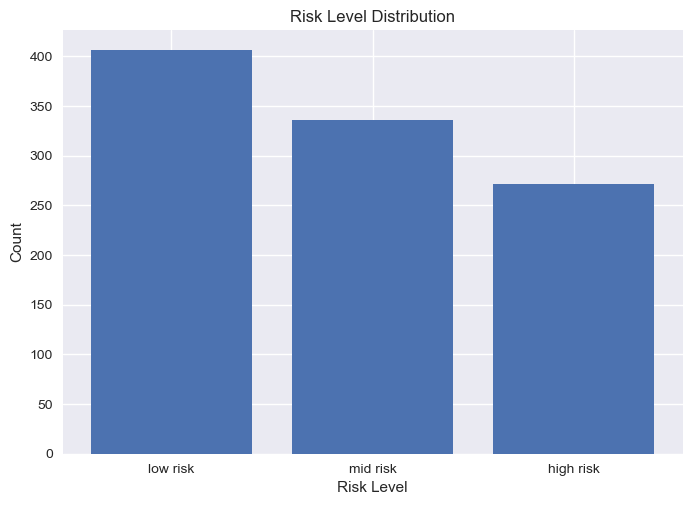

In [9]:
risk_counts = df['RiskLevel'].value_counts()

# Plotting a bar graph
plt.bar(risk_counts.index, risk_counts.values)
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Risk Level Distribution')
plt.show()

In [10]:
description = df.describe()
description

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


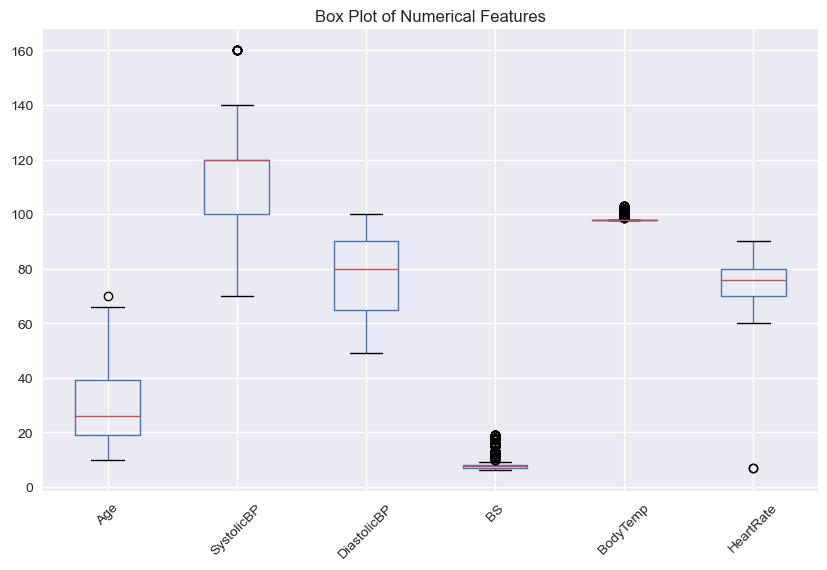

In [11]:
# Select only numerical columns for the box plot
numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Create a box plot for each numerical feature
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

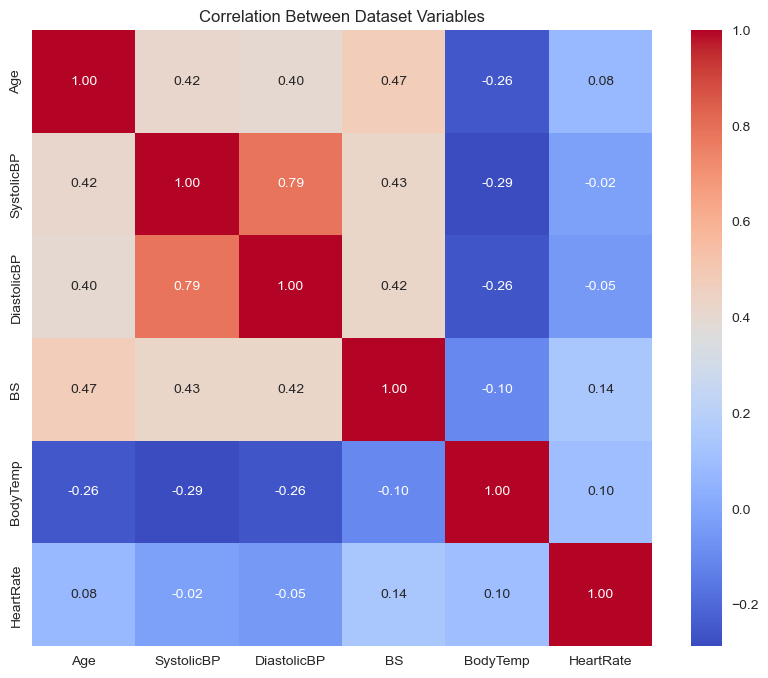

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Dataset Variables')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split as split
X = df.drop("RiskLevel", axis=1)
y = df.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.2, random_state=1)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Using original dataset
rf = RandomForestClassifier(random_state=100)
clf=rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
acc=accuracy_score(y_test, y_pred);
print(f"Original Dataset Accuracy: {acc}")
l={}
l['random forest']=acc

CM: [[59  1  3]
 [ 2 66  9]
 [ 5  7 51]]
Original Dataset Accuracy: 0.8669950738916257


In [15]:
# This is classifying that is the women in safe condition or not by predicting the risk level.

test_data = np.array([[5, 30, 8, 1.0, 98.0, 6]])

# Make predictions using the trained model
test_prediction = clf.predict(test_data)
test_prediction

array(['low risk'], dtype=object)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

   high risk       0.89      0.94      0.91        63
    low risk       0.89      0.86      0.87        77
    mid risk       0.81      0.81      0.81        63

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203



In [17]:
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
clf=svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
acc=accuracy_score(y_test, y_pred)
print(f'Accuracy:',acc)
l['svm']=acc


CM: [[42 17  4]
 [ 3 68  6]
 [ 3 24 36]]
Accuracy: 0.7192118226600985


In [18]:
# This is classifying that is the women in safe condition or not by predicting the risk level.

test_data = np.array([[5, 30, 8, 1.0, 98.0, 6]])

# Make predictions using the trained model
test_prediction = clf.predict(test_data)
test_prediction


array(['low risk'], dtype=object)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

   high risk       0.88      0.67      0.76        63
    low risk       0.62      0.88      0.73        77
    mid risk       0.78      0.57      0.66        63

    accuracy                           0.72       203
   macro avg       0.76      0.71      0.72       203
weighted avg       0.75      0.72      0.72       203



In [20]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
clf=decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
acc=accuracy_score(y_test, y_pred)
print(f'Accuracy:',)
print(y_pred.shape)
l['decision tree']=acc

CM: [[59  1  3]
 [ 4 66  7]
 [ 5  7 51]]
Accuracy:
(203,)


In [21]:
# This is classifying that is the women in safe condition or not by predicting the risk level.

test_data = np.array([[5, 30, 8, 1.0, 98.0, 6]])

# Make predictions using the trained model
test_prediction = clf.predict(test_data)
test_prediction

array(['mid risk'], dtype=object)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, decision_tree.predict(x_test)))

              precision    recall  f1-score   support

   high risk       0.87      0.94      0.90        63
    low risk       0.89      0.86      0.87        77
    mid risk       0.84      0.81      0.82        63

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203



In [23]:
max_key = max(l, key=l.get)
max_value = max(l.values())
print("maximum accuracy is of:", max_key)
print("accuracy:", max_value)

maximum accuracy is of: random forest
accuracy: 0.8669950738916257
